#

## *Plan*
1. Merging the data
2. Clean data and seperate the data by patch
2. Visual parts of the data to find connections between values
3. Create a model to classifiy our findings


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Now we import the data and look at the first elements

In [3]:
data = pd.read_csv(r'data/high_diamond_ranked_10min.csv')
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Summary of the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

Checking if there are any missing values

In [5]:
data.isna().values[data.isna().values==True]

array([], dtype=bool)

As we can see there are no missing values, we will now remove unnecessary data

### Visualization
We will now visualize the all the correlations between the columns

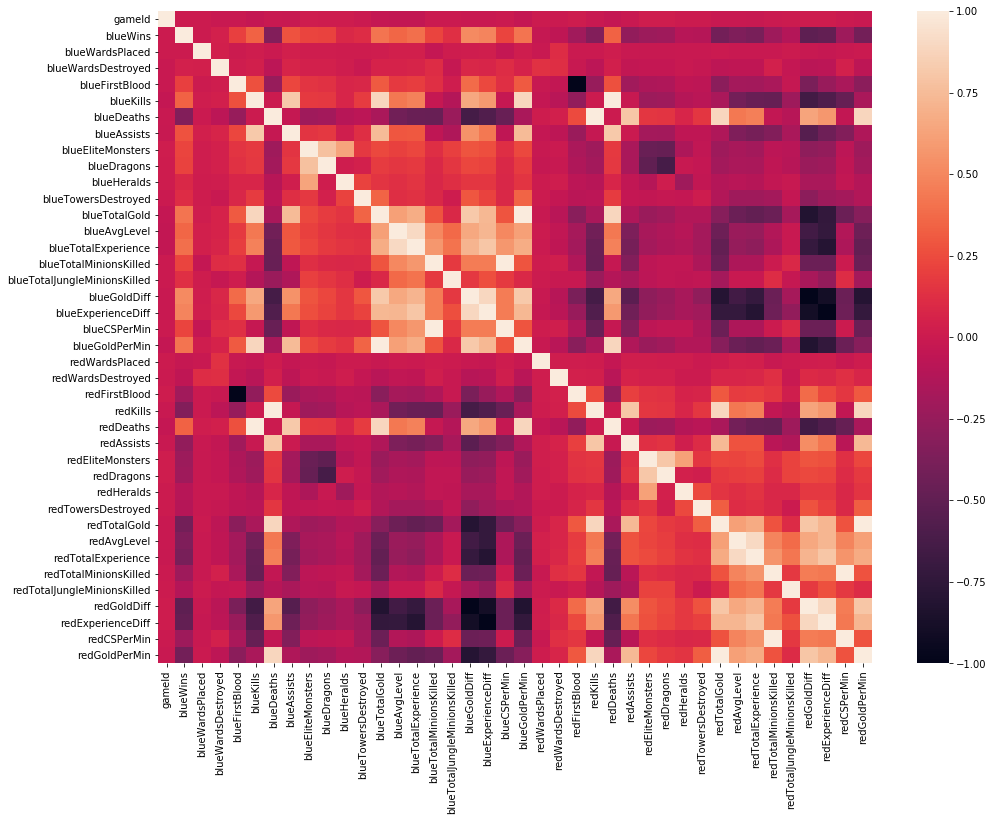

In [6]:
matrix = data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(matrix)
plt.show()

We want to see what variables have an affect on whever blue wins or not

In [7]:
blueWinsCorr = matrix["blueWins"]
blueWinsCorr = blueWinsCorr.reindex(blueWinsCorr.abs().sort_values().index)[::-1]
blueWinsCorr

blueWins                        1.000000
redGoldDiff                    -0.511119
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
redExperienceDiff              -0.489558
blueGoldPerMin                  0.417213
blueTotalGold                   0.417213
redGoldPerMin                  -0.411396
redTotalGold                   -0.411396
blueTotalExperience             0.396141
redTotalExperience             -0.387588
blueAvgLevel                    0.357820
redAvgLevel                    -0.352127
blueDeaths                     -0.339297
redKills                       -0.339297
redDeaths                       0.337358
blueKills                       0.337358
blueAssists                     0.276685
redAssists                     -0.271047
blueTotalMinionsKilled          0.224909
blueCSPerMin                    0.224909
blueEliteMonsters               0.221944
redEliteMonsters               -0.221551
blueDragons                     0.213768
redCSPerMin     

### Usefull features:
1. blueGoldDiff
2. blueExperienceDiff
3. blueGoldPerMin
4. redGoldPerMin
5. blueTotalExperience
6. redTotalExperience
7. blueAvgLevel
8. redAvgLevel
9. blueDeaths
10. blueKills
11. blueAssists
12. redAssists
13. blueCSPerMin
14. blueEliteMonsters
15. redEliteMonsters
16. blueDragons
17. redCSPerMin
18. redDragons
19. blueFirstBlood
20. blueTotalJungleMinionsKilled
21. blueTowersDestroyed
22. redTotalJungleMinionsKilled
23. redTowersDestroyed
24. redHeralds
25. blueHeralds
26. redWardsDestroyed
27. blueWardsDestroyed
28. redWardsPlaced
29. blueWardsPlaced

### Unnecessary features and reasons

redGoldDiff = -blueGoldDiff

redExperienceDiff = -blueExperienceDiff 

blueTotalGold = blueGoldPerMin

redTotalGold = redGoldPerMin

redKills = blueDeaths

redDeaths = blueKills

blueTotalMinionsKilled = blueCSPerMin

redTotalMinionsKilled = redCSPerMin

redFirstBlood = -blueFirstBlood

gameId - not a stat in the game 

In [10]:
df = data.drop(columns=["redGoldDiff","redExperienceDiff","blueTotalGold","redTotalGold","redDeaths","redKills","blueTotalMinionsKilled","redTotalMinionsKilled","redFirstBlood","gameId"])
df

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalExperience,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,8,0,0,0,0,6.8,17047,55,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,2,2,1,1,1,6.8,17438,52,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,14,0,0,0,0,6.8,17254,28,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,10,0,0,0,0,7.0,17961,47,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,7,1,1,0,0,7.0,18313,67,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,1,17,2,1,7,4,5,1,1,0,...,7,0,0,0,0,6.8,16498,34,22.9,1524.6
9875,1,54,0,0,6,4,8,1,1,0,...,3,0,0,0,0,7.0,18367,56,20.6,1545.6
9876,0,23,1,0,6,7,5,0,0,0,...,11,1,1,0,0,7.4,19909,60,26.1,1831.9
9877,0,14,4,1,2,3,3,1,1,0,...,1,0,0,0,0,7.2,18314,40,24.7,1529.8


## Model
Now that we have our data we can proceed to make a model that predicts if blue team will win

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [18]:
data = df.drop(columns="blueWins")
exp = df["blueWins"]
trainD, testD, trainE, testE = train_test_split(data, exp, random_state=4)

### Finding the most optimal k for knn module

In [19]:
def getBestKnn(X,y,maxK=30,folds=10):
    k_scores = []
    for i in range(1,maxK+1):
        knn = KNeighborsClassifier(n_neighbors=i)
        #gets the accuracy on every k-fold of the data
        scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy')
        #adds the estimated avarage to a list
        k_scores.append(scores.mean())
    #returns the index of the highest value and the list of all the values
    return k_scores.index(max(k_scores)),k_scores

We now use the function to find the best knn value for our training data

In [21]:
k,scores = getBestKnn(trainD,trainE)
knn = KNeighborsClassifier(n_neighbors=k)

In [ ]:
We fit the knn module with our training data and predict our test data

In [ ]:
knn.fit(trainD,trainE)
pred = knn.predict(testD)

Finnaly, we compare the prediction with our test data

In [24]:
metrics.accuracy_score(testE, pred)

0.7153846153846154